In [3]:
from denoising_diffusion_pytorch import Unet1D, GaussianDiffusion1D, Trainer1D, Dataset1D
import sys
sys.path.append("../")
from param_dataset import *

model = Unet1D(
        dim = 64,
        dim_mults = (1, 2, 4, 8),
        channels = 10
    )

diffusion = GaussianDiffusion1D(
    model,
    seq_length = 128,
    timesteps = 1000,
    objective = 'pred_v',
    auto_normalize=False
)

root_path = os.path.expanduser(f"~/Projects/GenAIProject/saved_data/checkpoints/gen_last_bn_eval_diverse/frost")
dataset = ParamDataset(root_path)

trainer = Trainer1D(
    diffusion,
    dataset = dataset,
    train_batch_size = 64,
    train_lr = 8e-5,
    train_num_steps = 7000,         # total training steps
    gradient_accumulate_every = 2,    # gradient accumulation steps
    ema_decay = 0.995,                # exponential moving average decay
    amp = True,                       # turn on mixed precision
    corr='frost',
    results_folder='frost_results'
)

/home/gc28692/anaconda3/envs/ttda/lib/python3.9/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(split_batches=True)
  warnings.warn(


In [16]:
trainer.load(2)

loading from version 1.11.0


In [17]:
sampled_seq = trainer.model.sample(batch_size = 1)

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

In [8]:
import matplotlib.pyplot as plt

In [11]:
root_dir = '../saved_data/checkpoints/gen_last_bn_eval_diverse/frost'
files = os.listdir(root_dir)
ck = torch.load(os.path.join(root_dir,files[0]))

vec = torch.cat([param.flatten() for param in ck['model_state_dict'].values()]).to('cpu')
vecs = torch.zeros(100,vec.shape[0])
for i in range(100):
    ck = torch.load(os.path.join(root_dir,files[i]))
    vecs[i,:] = torch.cat([param.flatten() for param in ck['model_state_dict'].values()]).to('cpu')

(array([  2.,   1.,   2.,   4.,   3.,  13.,  19.,  23.,  37.,  55.,  69.,  80.,  99., 109.,  82.,  49.,  34.,  61.,  50.,  52.,  55.,  46.,  61.,  60.,  37.,  44.,  30.,  21.,  20.,  15.,  12.,   4.,   9.,   6.,   3.,   3.,   2.,   3.,   1.,   4.]),
 array([-0.30790958, -0.28701183, -0.26611409, -0.24521634, -0.22431859, -0.20342085, -0.1825231 , -0.16162536, -0.14072761, -0.11982987, -0.09893212, -0.07803438, -0.05713663, -0.03623889, -0.01534114,  0.0055566 ,  0.02645435,  0.04735209,  0.06824984,  0.08914758,  0.11004533,  0.13094307,  0.15184082,  0.17273857,  0.19363631,  0.21453406,  0.23543181,  0.25632954,  0.27722728,  0.29812503,  0.31902277,  0.33992052,  0.36081827,  0.38171601,  0.40261376,  0.42351151,  0.44440925,  0.465307  ,  0.48620474,  0.50710249,  0.52800024]),
 <BarContainer object of 40 artists>)

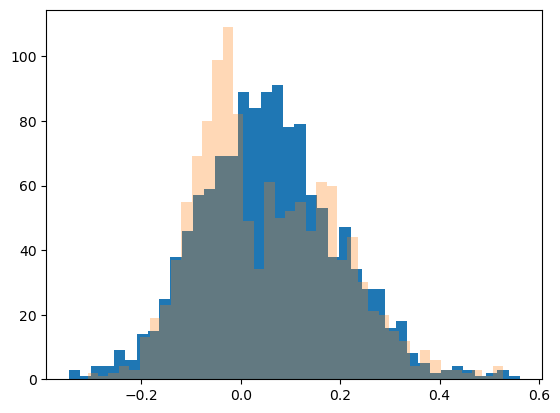

In [18]:
plt.hist(sampled_seq.view(-1).cpu(),bins=40)
plt.hist(vecs[0],bins=40,alpha=0.3)

In [11]:
sampled_seq.min()

tensor(0., device='cuda:0')